# Brainwave Band Analysis: ADHD vs Control

This notebook calculates and visualizes the average EEG signal in different brainwave bands (Delta, Theta, Alpha, Beta, Gamma) over time for ADHD and non-ADHD patients.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load EEG data
df = pd.read_csv('../data/adhdata.csv')  
# Define brainwave bands
bands = {
    'Delta': ['T7', 'T8', 'P7', 'P8'],
    'Theta': ['Fz', 'Cz', 'Pz'],
    'Alpha': ['O1', 'O2', 'P3', 'P4'],
    'Beta':  ['F3', 'F4', 'C3', 'C4'],
    'Gamma': ['F7', 'F8', 'Fp1', 'Fp2']
}


In [2]:
# Add a time step index per patient
df['Time'] = df.groupby('ID').cumcount()

# Split into groups
adhd_df = df[df['Class'] == 'ADHD'].copy()
control_df = df[df['Class'] != 'ADHD'].copy()

# Compute average band values per time step
for band, chs in bands.items():
    adhd_df[band] = adhd_df[chs].mean(axis=1)
    control_df[band] = control_df[chs].mean(axis=1)

# Group by time to compute population-level mean per time step
adhd_mean = adhd_df.groupby('Time')[[*bands.keys()]].mean()
control_mean = control_df.groupby('Time')[[*bands.keys()]].mean()


## Delta Band

Delta waves (0.5–4 Hz) are associated with deep sleep. In ADHD, elevated delta during wakefulness may indicate under-arousal.


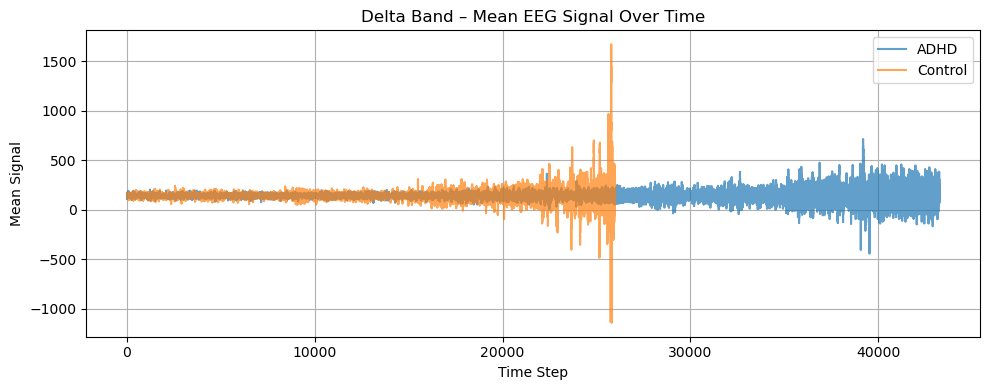

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(adhd_mean.index, adhd_mean['Delta'], label='ADHD', alpha=0.7)
plt.plot(control_mean.index, control_mean['Delta'], label='Control', alpha=0.7)
plt.title("Delta Band – Mean EEG Signal Over Time")
plt.xlabel("Time Step")
plt.ylabel("Mean Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Theta Band

Theta waves (4–8 Hz) are often elevated in ADHD and linked to inattention and daydreaming.


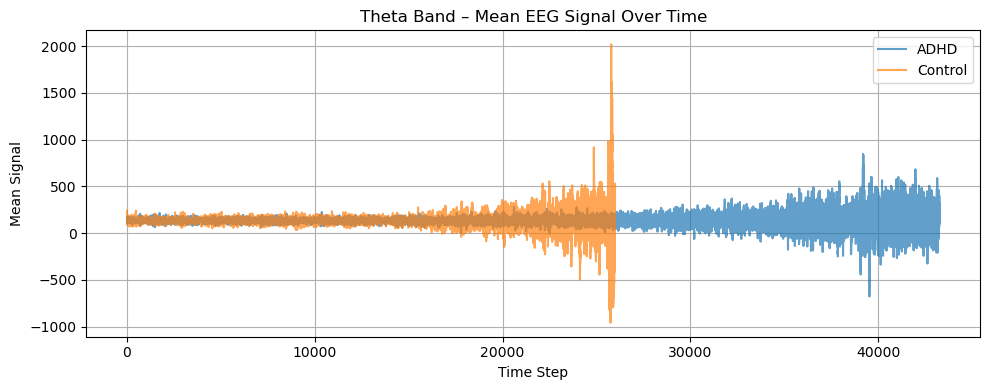

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(adhd_mean.index, adhd_mean['Theta'], label='ADHD', alpha=0.7)
plt.plot(control_mean.index, control_mean['Theta'], label='Control', alpha=0.7)
plt.title("Theta Band – Mean EEG Signal Over Time")
plt.xlabel("Time Step")
plt.ylabel("Mean Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Alpha Band

Alpha waves (8–12 Hz) reflect relaxed wakefulness. Reduced alpha may relate to hyperactivity or mental overload.


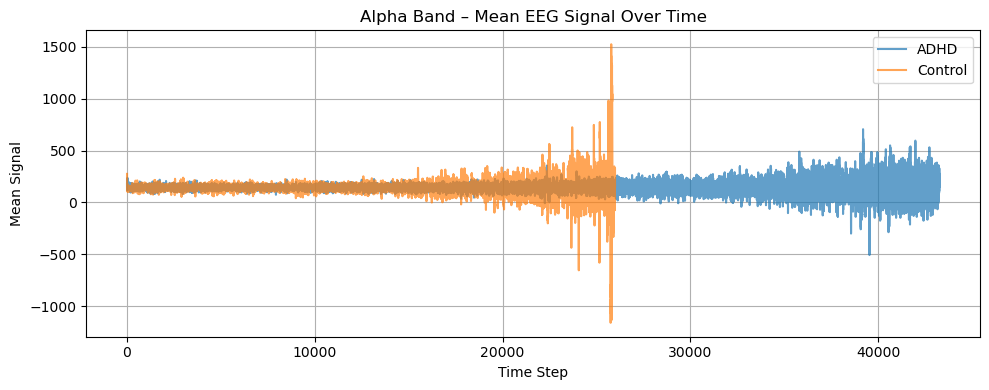

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(adhd_mean.index, adhd_mean['Alpha'], label='ADHD', alpha=0.7)
plt.plot(control_mean.index, control_mean['Alpha'], label='Control', alpha=0.7)
plt.title("Alpha Band – Mean EEG Signal Over Time")
plt.xlabel("Time Step")
plt.ylabel("Mean Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Beta Band

Beta waves (13–30 Hz) are linked to active thinking and attention. Lower beta may be seen in ADHD individuals.


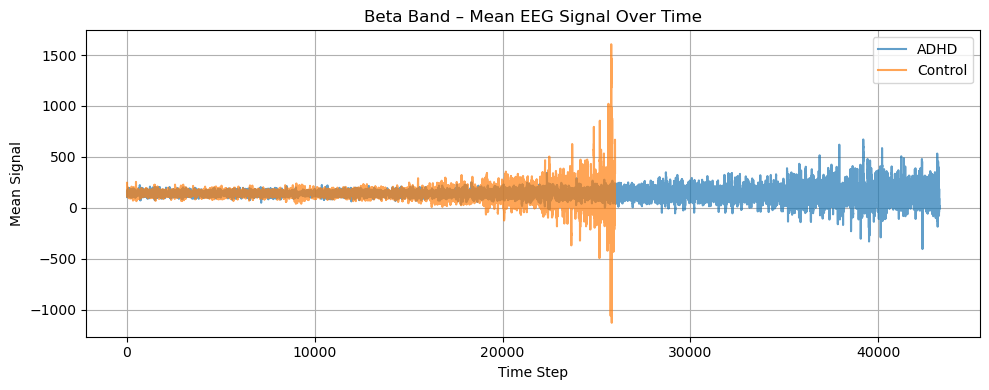

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(adhd_mean.index, adhd_mean['Beta'], label='ADHD', alpha=0.7)
plt.plot(control_mean.index, control_mean['Beta'], label='Control', alpha=0.7)
plt.title("Beta Band – Mean EEG Signal Over Time")
plt.xlabel("Time Step")
plt.ylabel("Mean Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Gamma Band

Gamma waves (>30 Hz) are involved in high-level cognitive function. Differences in gamma may reflect working memory or sensory integration issues in ADHD.


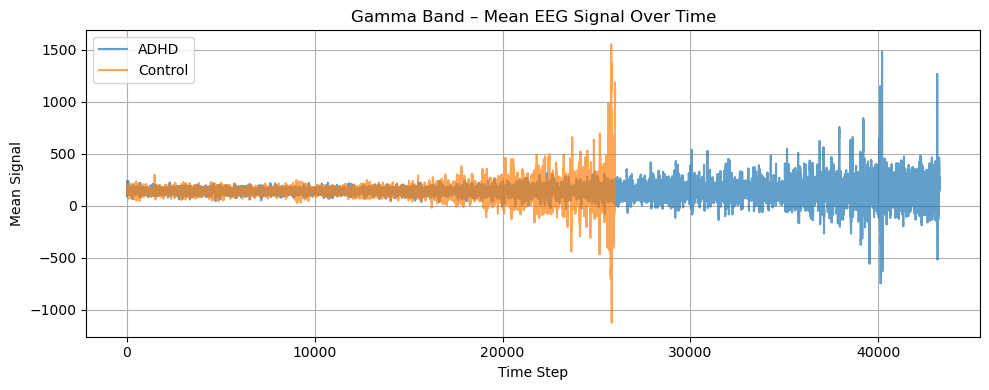

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(adhd_mean.index, adhd_mean['Gamma'], label='ADHD', alpha=0.7)
plt.plot(control_mean.index, control_mean['Gamma'], label='Control', alpha=0.7)
plt.title("Gamma Band – Mean EEG Signal Over Time")
plt.xlabel("Time Step")
plt.ylabel("Mean Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
